In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_unsup.csv
/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv


In [4]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


##Veri yükleme ve Ön işleme
df=pd.read_csv('/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv')

print(df.head())

                                              Review  Rating  Sentiment
0  Kurt Russell's chameleon-like performance, cou...      10          1
1  It was extremely low budget(it some scenes it ...       8          1
2  James Cagney is best known for his tough chara...       8          1
3  Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1
4  One of the last classics of the French New Wav...      10          1


In [6]:
# Genel bilgiler
print(df.info())

# İstatistiksel özet
print(df.describe())

#Eksik Değer Kontrolü
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     50000 non-null  object
 1   Rating     50000 non-null  int64 
 2   Sentiment  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB
None
             Rating     Sentiment
count  50000.000000  50000.000000
mean       5.495340      0.500000
std        3.478721      0.500005
min        1.000000      0.000000
25%        2.000000      0.000000
50%        5.500000      0.500000
75%        9.000000      1.000000
max       10.000000      1.000000
Review       0
Rating       0
Sentiment    0
dtype: int64


In [15]:

from sklearn.preprocessing import LabelEncoder

# Rating'leri kategorilere ayırma 
df=pd.read_csv('/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv')

def categorize_rating(rating):
    if rating <= 4:
        return 'Low'
    elif rating <= 7:
        return 'Medium'
    else:
        return 'High'

# Rating_Category sütununu ekleme

df['Rating_Category'] = df['Rating'].apply(categorize_rating)

# Kategorik verileri sayısal verilere dönüştürme (Label Encoding)

label_encoder = LabelEncoder()
df['Rating_Category'] = label_encoder.fit_transform(df['Rating_Category'])


print(df.head(10))



                                              Review  Rating  Sentiment  \
0  Kurt Russell's chameleon-like performance, cou...      10          1   
1  It was extremely low budget(it some scenes it ...       8          1   
2  James Cagney is best known for his tough chara...       8          1   
3  Following the brilliant "Goyôkiba" (aka. "Hanz...       8          1   
4  One of the last classics of the French New Wav...      10          1   
5  Having just watched this film again from a 199...      10          1   
6  The Straight Story is a truly beautiful movie ...      10          1   
7  Four teenage girlfriends drive to Fort Laurdal...       7          1   
8  I haven't seen all of Jess Franco's movies, I ...       9          1   
9  What's in a name? If the name is Jerry Bruckhe...       7          1   

   Rating_Category  
0                0  
1                0  
2                0  
3                0  
4                0  
5                0  
6                0  
7     

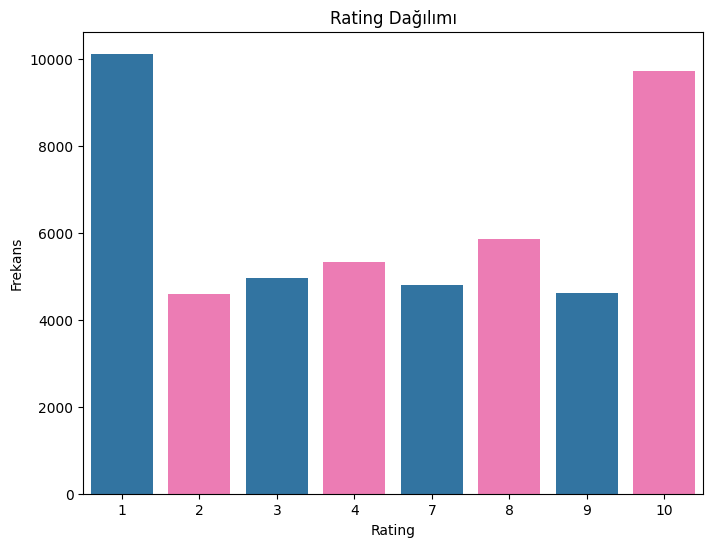

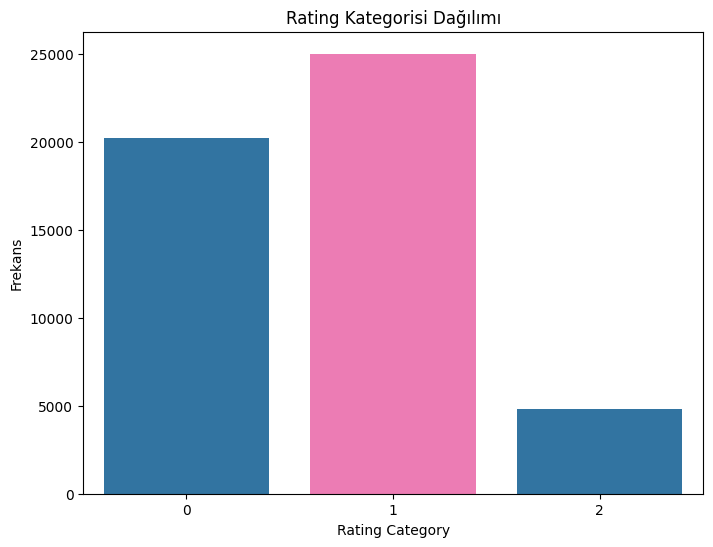

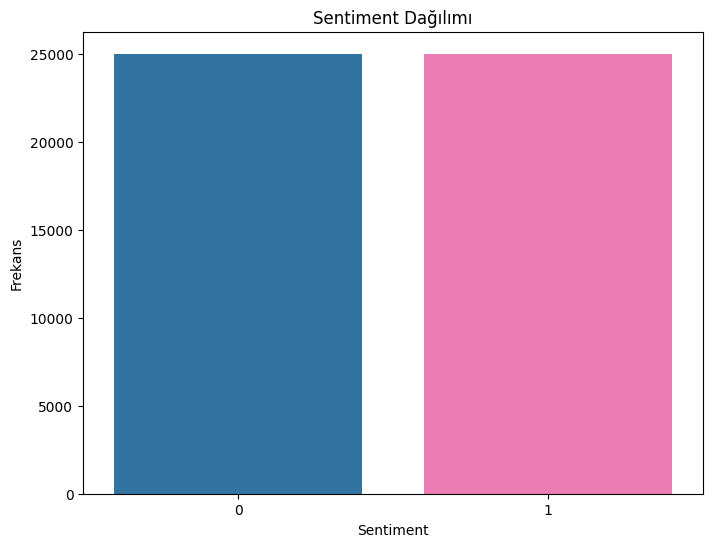

In [17]:
## VİSUAL EDA (GÖRSEL EDA)


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Renk paletim
bou_palette = ["#1f77b4", "#ff69b4"]

# # Rating dağılımının görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df, palette=bou_palette)
plt.title('Rating Dağılımı')
plt.xlabel('Rating')
plt.ylabel('Frekans')
plt.show()

#Rating_Category dağılımının görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating_Category', data=df, palette=bou_palette)
plt.title('Rating Kategorisi Dağılımı')
plt.xlabel('Rating Category')
plt.ylabel('Frekans')
plt.show()

#Sentiment dağılımının görselleştirilmesi
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df, palette=bou_palette)
plt.title('Sentiment Dağılımı')
plt.xlabel('Sentiment')
plt.ylabel('Frekans')
plt.show()


In [ ]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer

# Veriyi yükleyin
df = pd.read_csv('/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv')

# Rating'leri kategorilere ayırma
def categorize_rating(rating):
    if rating <= 4:
        return 'Low'
    elif rating <= 7:
        return 'Medium'
    else:
        return 'High'

# Rating_Category sütununu ekleme
df['Rating_Category'] = df['Rating'].apply(categorize_rating)

# Kategorik verileri sayısal verilere dönüştürme 
label_encoder = LabelEncoder()
df['Rating_Category'] = label_encoder.fit_transform(df['Rating_Category'])

# TF-IDF Vektörleştirme metinleri sayısal formata dönüştürme
tfidf = TfidfVectorizer(max_features=5000)  
X_tfidf = tfidf.fit_transform(df['Review']).toarray()

# Sayısal sütunları ekleme 
X = pd.DataFrame(X_tfidf)
X['Rating'] = df['Rating']
X['Rating_Category'] = df['Rating_Category']

# Sütun adlarını string'e çevirme (önemli)
X.columns = X.columns.astype(str)

# Hedef değişken (Sentiment)
y = df['Sentiment']

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Eksik verileri doldurma
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

##########################################################################
# Denetimli Öğrenme Modeli: Random Forest

#Bunu seçmemin nedeni:Birden fazla karar ağacından oluşmakta ve her ağaç bağımsız olarak eğitilir.
#Bundan dolayı model, farklı ağaçların tahminlerini birleştirerek daha iyi genelleme yapabilir.
#Özellikle Overfitting'i azaltma ,birçok ağaç  daha az overfitting yapar ve daha iyi genel performans sağlar.

rf_model = RandomForestClassifier(max_depth=10, n_estimators=100)  # max_depth'ü sınırladık

# Cross-validation ile model performansı
rf_cv_scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5)
print(f"Random Forest CV Doğruluğu: {np.mean(rf_cv_scores)}")

# Hiperparametre optimizasyonu için GridSearchCV
param_grid = {
    'n_estimators': [50, 100],  # Azaltılmış değerler
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5],
}
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_imputed, y_train)

# En iyi parametrelerle final modelini eğitme
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train_imputed, y_train)

# Test setinde performansı ölçme
y_pred_rf = best_rf_model.predict(X_test_imputed)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Final Random Forest Test Seti Doğruluğu: {accuracy_rf}")

# Karışıklık Matrisi ve Rapor
print("Random Forest Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

##########################################################################

# Gradient Boosting Modeli
gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1)  # n_estimators azaltıldı
gb_model.fit(X_train_imputed, y_train)

# Test seti üzerinde tahmin yapma
y_pred_gb = gb_model.predict(X_test_imputed)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Final Gradient Boosting Test Seti Doğruluğu: {accuracy_gb}")

# Karışıklık Matrisi ve Rapor
print("Gradient Boosting Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_gb))
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     50000 non-null  object
 1   Rating     50000 non-null  int64 
 2   Sentiment  50000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


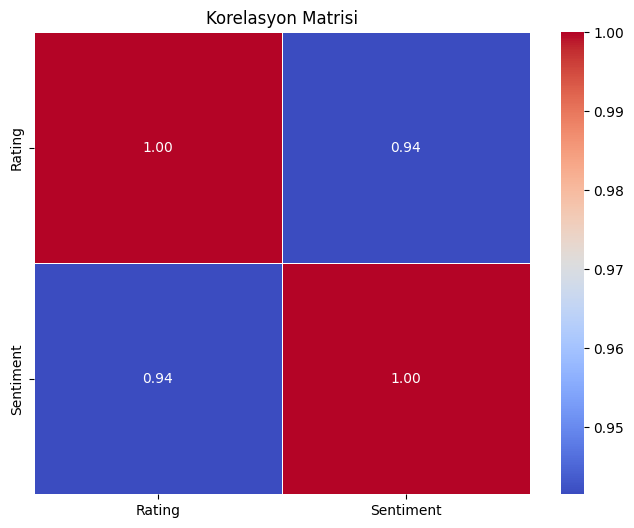

Rating       0.941534
Sentiment    1.000000
Name: Sentiment, dtype: float64


NameError: name 'X_scaled' is not defined

In [7]:

import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Kaggle sürekli hata verdiği için her şeyi tekrar buraya ekledim...

# Veriyi yükleyin
df = pd.read_csv('/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv')
df.info()
df.describe()

# Korelasyon matrisi
corr_matrix = df[['Rating', 'Sentiment']].corr()

#  görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

# Korelasyon matrisi oluşturma
corr_matrix = df[['Rating', 'Sentiment']].corr()

# 'Sentiment' değişkeni ile olan korelasyonları belirleme
cor_target = abs(corr_matrix['Sentiment'])

# Korelasyonu 0.1'den büyük olan özellikleri seçme
relevant_features = cor_target[cor_target > 0.1]
print(relevant_features)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score, completeness_score, v_measure_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score


#K-Means algoritmasıyla eğitip bilgi edinmeye çalıştım  ama doğruluk hakkında olanları anlamadım .
#Overfittingi düzelteyim derken iyice bozuldu topayamadım çıktı için özür dilerim...
#K-Means, verilerin yoğunluk merkezlerine dayalı çalışır, bu da genellikle daha iyi anlamlı gruplar oluşturmasını sağlar. Özellikle belirgin kümelerin olduğu durumlarda iyi sonuç verir.
#Az önce çıktı veriyordu şimdi vermiyor visual studio code üzerinden çalışmıştım burada olmadı..
#Gerçekten çabaladığıma inanıyorum teşekkürler.
# Veri setini yükleme
df = pd.read_csv('/kaggle/input/imdb-movie-reviews-with-ratings-50k/imdb_sup.csv')

# Sayısal sütunları ekleme
df = df[['Sentiment', 'Rating']]  # Sadece gerekli sütunlar

# Özellikler ve hedef değişken
X = df[['Rating']]  # Özellikler (Rating)
y = df['Sentiment']  # Hedef değişken (Sentiment)


# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=42)

# KMeans Kümeleme
kmeans = KMeans(n_clusters=3,n_init=10, random_state=42)
kmeans.fit(X_train)

# Optimal küme sayısını bulmak için Elbow Yöntemi
wcss = []
for i in range(1, 11):  # 1'den 10'a kadar küme sayısı dene
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)  # X_scaled verileri üzerinde kümeleme
    wcss.append(kmeans.inertia_)

# Elbow Method grafiği
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Test seti üzerinde tahmin yapma
y_pred = kmeans.predict(X_test)

# Kümeleme değerlendirme sonuçları
print("Adjusted Rand Index:", adjusted_rand_score(y_test, y_pred))
print("Homogeneity Score:", homogeneity_score(y_test, y_pred))
print("Completeness Score:", completeness_score(y_test, y_pred))
print("V-Measure Score:", v_measure_score(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)


# Sentiment Dağılım Grafiği (Quality Distribution Plot)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='viridis')
plt.title('Sentiment Distribution Plot', fontsize=23)
plt.show()

# Korelasyon Matrisi
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Sentiment ile en yüksek pozitif korelasyona sahip özellikler
correlation_target = correlation_matrix['Sentiment'].sort_values(ascending=False)

# Pozitif korelasyonlar
plt.figure(figsize=(10, 5))
correlation_target[1:6].plot(kind='bar', color='green')  # Sentiment ile en yüksek 5 pozitif korelasyon
plt.title('Top 5 Positive Correlations with Sentiment')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# Negatif korelasyonlar
plt.figure(figsize=(10, 5))
correlation_target[-5:].plot(kind='bar', color='red')  # En yüksek 5 negatif korelasyon
plt.title('Top 5 Negative Correlations with Sentiment')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

# K-Means Elbow Method tekrarı (SSE)
sse = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

# Hiyerarşik Kümeleme Dendrogramı
linked = linkage(X, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# PCA ile boyut indirgeme
pca = PCA(n_components=2)  # 2 boyuta indirgemek için
X_pca = pca.fit_transform(X_scaled)

# PCA sonucu veri çerçevesine dönüştürme
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Sentiment'] = df['Sentiment'].values  # Hedef değişkeni ekleme

# PCA sonuçlarını görselleştirme
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Sentiment', data=pca_df, palette='viridis', alpha=0.7)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Sentiment')
plt.show()